In [1]:
#Importing the necessary libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /Users/patri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/patri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#Importing the dataset

In [5]:
df = pd.read_csv("amazon_reviews.csv")

In [6]:
#Checking the first 5 lines of the dataset to get an idea of how it looks

In [7]:
df.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [8]:
#Checking columns, null values and data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [10]:
#there is only one review missing

In [11]:
df["Sentiment"].unique()

array([1, 2, 3, 4, 5])

In [12]:
df["Sentiment"].value_counts()

1    5000
2    5000
3    5000
4    5000
5    5000
Name: Sentiment, dtype: int64

In [13]:
#Reviews go from 1 to 5

In [14]:
#Dropping null values

In [15]:
df.dropna(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24999 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  24999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 585.9+ KB


In [17]:
#Since we want to predict if a review is positive or not, we assign the numeric value 1 
#(positive) to those reviews that have 4 or 5, and the numeric value 0 (negative) to 
#those reviews that have 3 or less

In [18]:
df.loc[df['Sentiment']<=3,'Sentiment'] = 0
df.loc[df['Sentiment']>3,'Sentiment'] = 1

In [19]:
#Checking if it worked

In [20]:
df["Sentiment"].unique() #now, we only have two unique values in this column 0 (negative) and 1 (positive)

array([0, 1])

In [21]:
#Now, I need to clean the reviews. I will start removing the stopwords

In [22]:
stp_words=stopwords.words('english')
def clean_review(review): 
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview 

df['Review']=df['Review'].apply(clean_review)

In [23]:
df["Review"]

0        Fast shipping product cheaply made I brought g...
1        This case takes long ship even worth DONT BUY!!!!
2        Good droids. Not good iPhones. You cannot use ...
3        The cable compatible macbook iphone. Also conn...
4        The case nice glow light. I'm disappointed pro...
                               ...                        
24995    These cables (lightning) far superior cables m...
24996    This unit performs exactly advertised. I use c...
24997    I key cut local hardware store cut free, progr...
24998    I love case I ordered amazon. It color looked ...
24999    Awsome!!! I loved little speaker. It great sou...
Name: Review, Length: 24999, dtype: object

In [24]:
#Checking how many counts there are for positive and negative reviews

In [25]:
df['Sentiment'].value_counts()

0    15000
1     9999
Name: Sentiment, dtype: int64

In [26]:
#There are more negative reviews than positive reviews

In [27]:
#Creating a wordcloud with the most common words

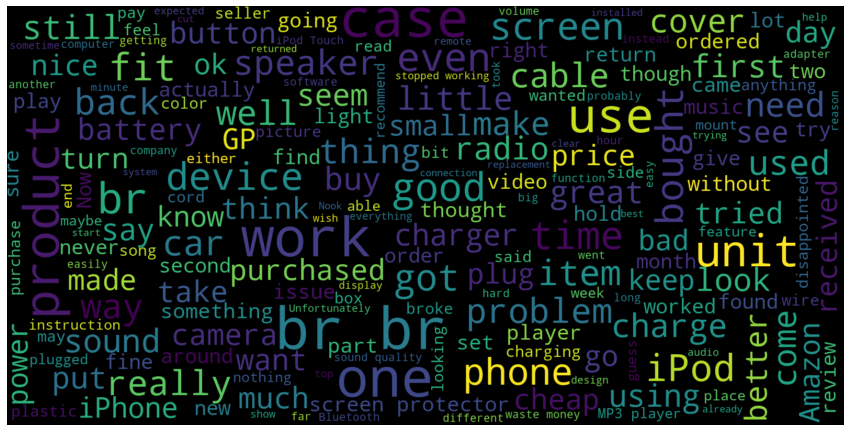

In [28]:
consolidated_negative=' '.join(word for word in df['Review'][df['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated_negative),interpolation='bilinear')
plt.axis('off')
plt.show()

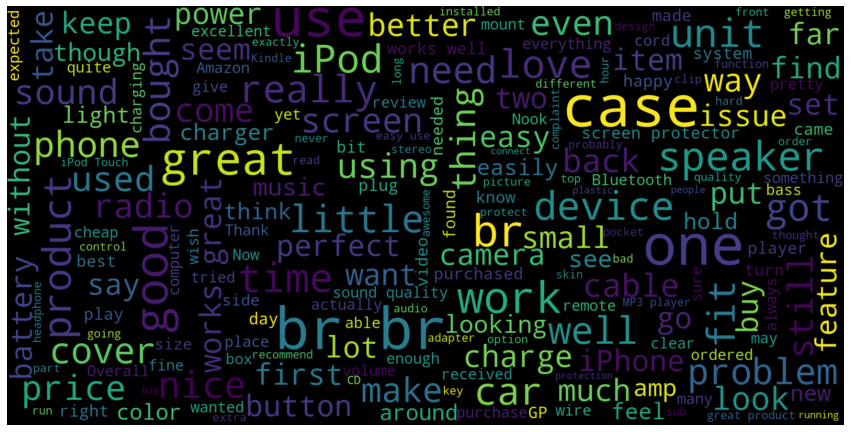

In [29]:
consolidated_positive=' '.join(word for word in df['Review'][df['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated_positive),interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Converting tokens into vectors

In [30]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(df['Review'] ).toarray()

In [ ]:
#Performing the test/train split

In [31]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,df['Sentiment'],
                                                test_size=0.25 ,
                                                random_state=42)

In [ ]:
#Exploring the Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred=model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))

0.81632


In [ ]:
#Checking the confussion matrix

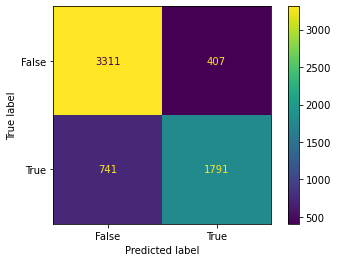

In [33]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = [False, True])

cm_display.plot()
plt.show()